# Seguimiento de posición usando Filtro de Partículas

El filtro de partículas es un método de estimación probabilística utilizado para seguir el estado de un sistema dinámico cuando las mediciones son ruidosas y el modelo puede ser no lineal o no gaussiano. El método representa la creencia sobre el estado mediante un conjunto de partículas (posibles estados) y sus pesos asociados. En cada iteración, las partículas se predicen según el modelo de movimiento, se actualizan sus pesos según la medición observada y luego se re-muestrean para concentrar las partículas en las regiones más probables. Así, el filtro de partículas permite aproximar la distribución posterior del estado a lo largo del tiempo.


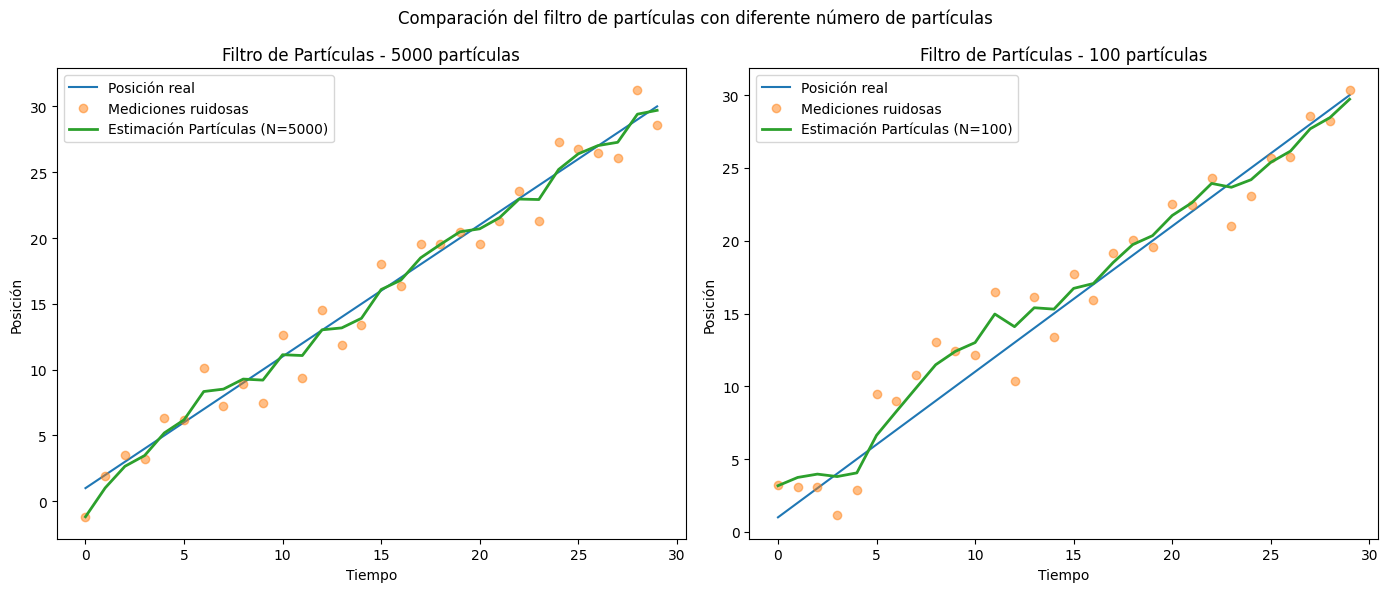

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def particle_filter(N, n_iter):
    particles = np.random.uniform(-10, 10, size=N)
    weights = np.ones(N) / N
    true_pos = 0
    measurements = []
    estimates = []
    for t in range(n_iter):
        true_pos += 1.0
        z = true_pos + np.random.normal(0, 2.0)
        measurements.append(z)
        # Predicción
        particles = particles + 1.0 + np.random.normal(0, 0.5, size=N)
        # Actualización
        weights *= np.exp(-(particles - z)**2 / (2*1.0))
        weights += 1.e-300
        weights /= np.sum(weights)
        # Remuestreo
        indices = np.random.choice(range(N), size=N, p=weights)
        particles = particles[indices]
        weights = np.ones(N) / N
        estimates.append(np.mean(particles))
    return measurements, estimates

# Comparación: 5000 partículas vs 100 partículas
N1, N2 = 5000, 100
n_iter = 30

meas1, est1 = particle_filter(N1, n_iter)
meas2, est2 = particle_filter(N2, n_iter)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(range(n_iter), [i+1 for i in range(n_iter)], label="Posición real")
plt.plot(meas1, 'o', alpha=0.5, label="Mediciones ruidosas")
plt.plot(est1, linewidth=2, label=f"Estimación Partículas (N={N1})")
plt.title(f"Filtro de Partículas - {N1} partículas")
plt.xlabel("Tiempo")
plt.ylabel("Posición")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(n_iter), [i+1 for i in range(n_iter)], label="Posición real")
plt.plot(meas2, 'o', alpha=0.5, label="Mediciones ruidosas")
plt.plot(est2, linewidth=2, label=f"Estimación Partículas (N={N2})")
plt.title(f"Filtro de Partículas - {N2} partículas")
plt.xlabel("Tiempo")
plt.ylabel("Posición")
plt.legend()

plt.suptitle("Comparación del filtro de partículas con diferente número de partículas")
plt.tight_layout()
plt.show()

En los gráficos se compara el desempeño del filtro de partículas usando 5000 y 100 partículas. La línea azul muestra la posición real, los puntos naranjas son las mediciones ruidosas y la línea verde es la estimación del filtro. Se observa que, con más partículas, la estimación es más precisa y sigue mejor la trayectoria real, mientras que con menos partículas la estimación puede ser más ruidosa o desviarse. Esto ilustra cómo el número de partículas afecta la calidad de la estimación en el filtro de partículas.